In [1]:
#Charger les packages
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Récupérer les données de Boston dans les variables X et y
(X, y) = datasets.load_boston(return_X_y=True)
columns = datasets.load_boston().feature_names

In [3]:
#Ajouter la colonne p+1 à la matrice X
X = np.c_[X, np.ones(X.shape[0])]

In [4]:
#Diviser notre jeu de données en données d'entrainement et données de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

### 1. Notre fonction qui renvoie l'EMCO

In [5]:
def regression(X, y):
    
    #(X'X)^-1
    partie1 = np.linalg.pinv(np.dot(np.transpose(X), X))
    
    #X'y
    partie2 = np.dot(np.transpose(X), y)
    
    #Combinaison [(X'X)^-1(X'y)]
    emco = np.dot(partie1, partie2)
    
    #Alpha et beta
    alpha_chap = emco[:-1]
    beta_chap = emco[-1]
    
    return (alpha_chap, beta_chap)

In [6]:
alpha_chapeau, beta_chapeau = regression(X, y)

### Comparaison avec scikitlearn

In [7]:
#Créer le modèle
model = linear_model.LinearRegression()
model.fit(X,y)

print(f'alpha chapeau : {alpha_chapeau}\n-----------------------------------------------------------------------\n')
print(f'Coef_ : {model.coef_}\n-----------------------------------------------------------------------\n')
print(f'beta chapeau : {beta_chapeau}\n-----------------------------------------------------------------------\n')
print(f'Intercept_ : {model.intercept_}')

alpha chapeau : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
-----------------------------------------------------------------------

Coef_ : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01  0.00000000e+00]
-----------------------------------------------------------------------

beta chapeau : 36.45948838510867
-----------------------------------------------------------------------

Intercept_ : 36.45948838509001


## On voit que alpha_chap = model.coef_ et beta_chap = model.intercept_

## 2. Notre fonction qui renvoie Y_chapeau

In [8]:
def regress(X, alpha, beta):
    return (np.dot(X[:,:-1], alpha) + beta)

In [9]:
y_chapeau = regress(X, alpha_chapeau, beta_chapeau)
#Afficher les 5 premières valeurs de y_chapeau pour voir
y_chapeau[:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

## 3. Calcul de Epsilon_chapeau

In [10]:
def erreur(y, ychap):
    error = np.sum([np.math.pow((y[i]-ychap[i]),2) for i in range (len(y))])
    return error
erreur(y, y_chapeau)

11078.784577954977

## 4.a  Fonction ridge_regression(X, Y , lambda)

In [11]:
def ridge_regression(X, y , lambda_):
    
    # (X'X + lambda*I)^-1
    partie1 = np.linalg.pinv(np.dot(np.transpose(X), X) + np.dot(lambda_, np.eye(X.shape[1])))
    #X'Y
    partie2 = np.dot(np.transpose(X), y)
    #Combinaison
    emco = np.dot(partie1, partie2)
    #Alpha et beta
    alpha_chap = emco[:-1]
    beta_chap = emco[-1]
    
    return (alpha_chap, beta_chap)

In [12]:
alpha_chap, beta_chap = ridge_regression(X, y , lambda_=1.0)

model_reg = linear_model.Ridge(alpha=1.0)
model_reg.fit(X,y)

print(f'alpha_chapeau : {alpha_chap}\n-----------------------------------------------------------------------------------\n')
print(f'Coef : {model_reg.coef_}\n-----------------------------------------------------------------------------------\n')
print(f'beta_chapeau : {beta_chap}\n-----------------------------------------------------------------------------------\n')
print(f'Intercept : {model_reg.intercept_}')

alpha_chapeau : [-0.09860481  0.04825543 -0.00877533  2.65452916 -6.28879951  4.86927445
 -0.00665675 -1.16424615  0.23051293 -0.01124433 -0.63084039  0.01229636
 -0.47729433]
-----------------------------------------------------------------------------------

Coef : [-1.04595278e-01  4.74432243e-02 -8.80467889e-03  2.55239322e+00
 -1.07770146e+01  3.85400020e+00 -5.41453810e-03 -1.37265353e+00
  2.90141589e-01 -1.29116463e-02 -8.76074394e-01  9.67327945e-03
 -5.33343225e-01  0.00000000e+00]
-----------------------------------------------------------------------------------

beta_chapeau : 15.670542705587195
-----------------------------------------------------------------------------------

Intercept : 31.597669818274046


## 4.b l’évolution des coefficients du vecteur α en fonction de lambda

In [13]:
lambdas = np.linspace(0.0001, 1000, 1000)
ridge = linear_model.Ridge(normalize = False)
coefs = []

for a in lambdas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

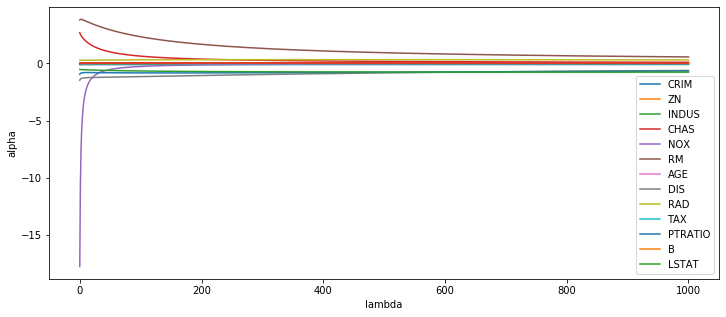

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(lambdas, coefs)
plt.xlabel('lambda')
plt.ylabel('alpha')
plt.legend(columns, loc="lower right")
plt.show()

### Toutes les variables expliquent notre modèle sauf les variables CHAS, NOX et RM (Surtout NOX)

## 4.c Meilleure valeur de lambda

In [15]:
param_grid = {'alpha':lambdas}
model = GridSearchCV(linear_model.Ridge(), param_grid, cv=50)
model.fit(X, y)
model.best_params_

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 140.14022612612612}

### Best lambda = 140.14

### Entrainer un model Ridge avec cette valeur

In [16]:
best_alpha = 140.14
model = linear_model.Ridge(alpha=best_alpha)
model.fit(X,y)

Ridge(alpha=140.14, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Erreur au sens des moindres carrés avec best lambda :

In [17]:
prediction = model.predict(X)
mean_squared_error(y, prediction)

24.204442644770307

## 5.a L’évolution des coefficients du vecteur α en fonction de lambda (Lasso)

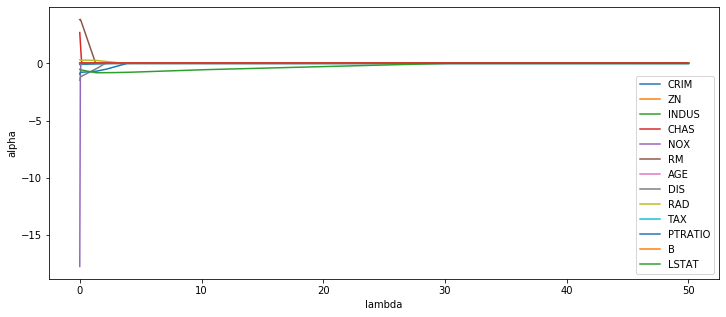

In [18]:
plt.figure(figsize=(12,5))
lambdas = np.linspace(0.0001, 50, 1000)
coefs = []

for a in lambdas:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

plt.plot(lambdas, coefs)
plt.xlabel('lambda')
plt.ylabel('alpha')
plt.legend(columns, loc="lower right")
plt.show()

### Toutes les variables expliquent a peu pres notre modèle sauf NOX 

## 5.b Meilleure valeur de lamda

In [19]:
lambdas = np.linspace(1e-3, 1e3, 1000)
param_grid = {'alpha':lambdas}
model = GridSearchCV(linear_model.Lasso(), param_grid, cv=50)
model.fit(X, y)
model.best_params_

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.001}

### best lambda = 0.001

### Construire un model Lasso avec ce lambda

In [20]:
best_alpha = 0.001
model = linear_model.Lasso(alpha=best_alpha)
model.fit(X,y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Erreur au sens des moindres carres avec ce lambda

In [21]:
prediction = model.predict(X)
mean_squared_error(y, prediction)

21.89519775975806